# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

load and check train data and label

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Valid Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Valid Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [3]:
print("X_train Shape: {}".format(X_train.shape))
print("y_train Shape: {}".format(y_train.shape))

X_train Shape: (34799, 32, 32, 3)
y_train Shape: (34799,)


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
import numpy as np
import random
import cv2

In [7]:
import matplotlib.image as mpimg
import glob
import os
import matplotlib.pyplot as plt
import math

12


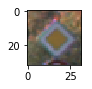

In [8]:
index = random.randint(0,len(X_train))
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

### visualize function:

show images,and class title

In [9]:
def visualize_images(list_imgs,title_name,cols=5,show_title=[],save_name='save.jpg'):
    rows = math.ceil(len(list_imgs)/cols)
    fig,ax_array = plt.subplots(rows,cols,figsize=(cols*10,rows*5))
    plt.suptitle(title_name,fontsize=60,color='b')
    imgs_count = len(list_imgs)
    for idx,ax in enumerate(ax_array.ravel()):
        if idx < imgs_count:
            ax.imshow(list_imgs[idx])
            if len(show_title) == 0:
                ax.set_title('{:02d}'.format(idx),fontsize=30,color='r')
            else:
                ax.set_title(show_title[idx],fontsize=30,color='r')
            
        else:
            ax.axis('off')
            
    plt.setp([a.get_xticklabels() for a in ax_array.ravel()],visible=False)
    plt.setp([a.get_yticklabels() for a in ax_array.ravel()],visible=False)
    
    if len(save_name)>0:
        plt.savefig("examples/"+save_name)
    plt.show()

### visualize class images

load all 43 classes images from X_train, and show it 

In [10]:
def get_count_per_class(y_dataset):
    num_classes = len(np.unique(y_dataset))
    count_per_class = np.zeros( num_classes )

    for class_idx in range( num_classes ):
        count_per_class[class_idx] = np.sum(y_dataset == class_idx )

    return count_per_class

43


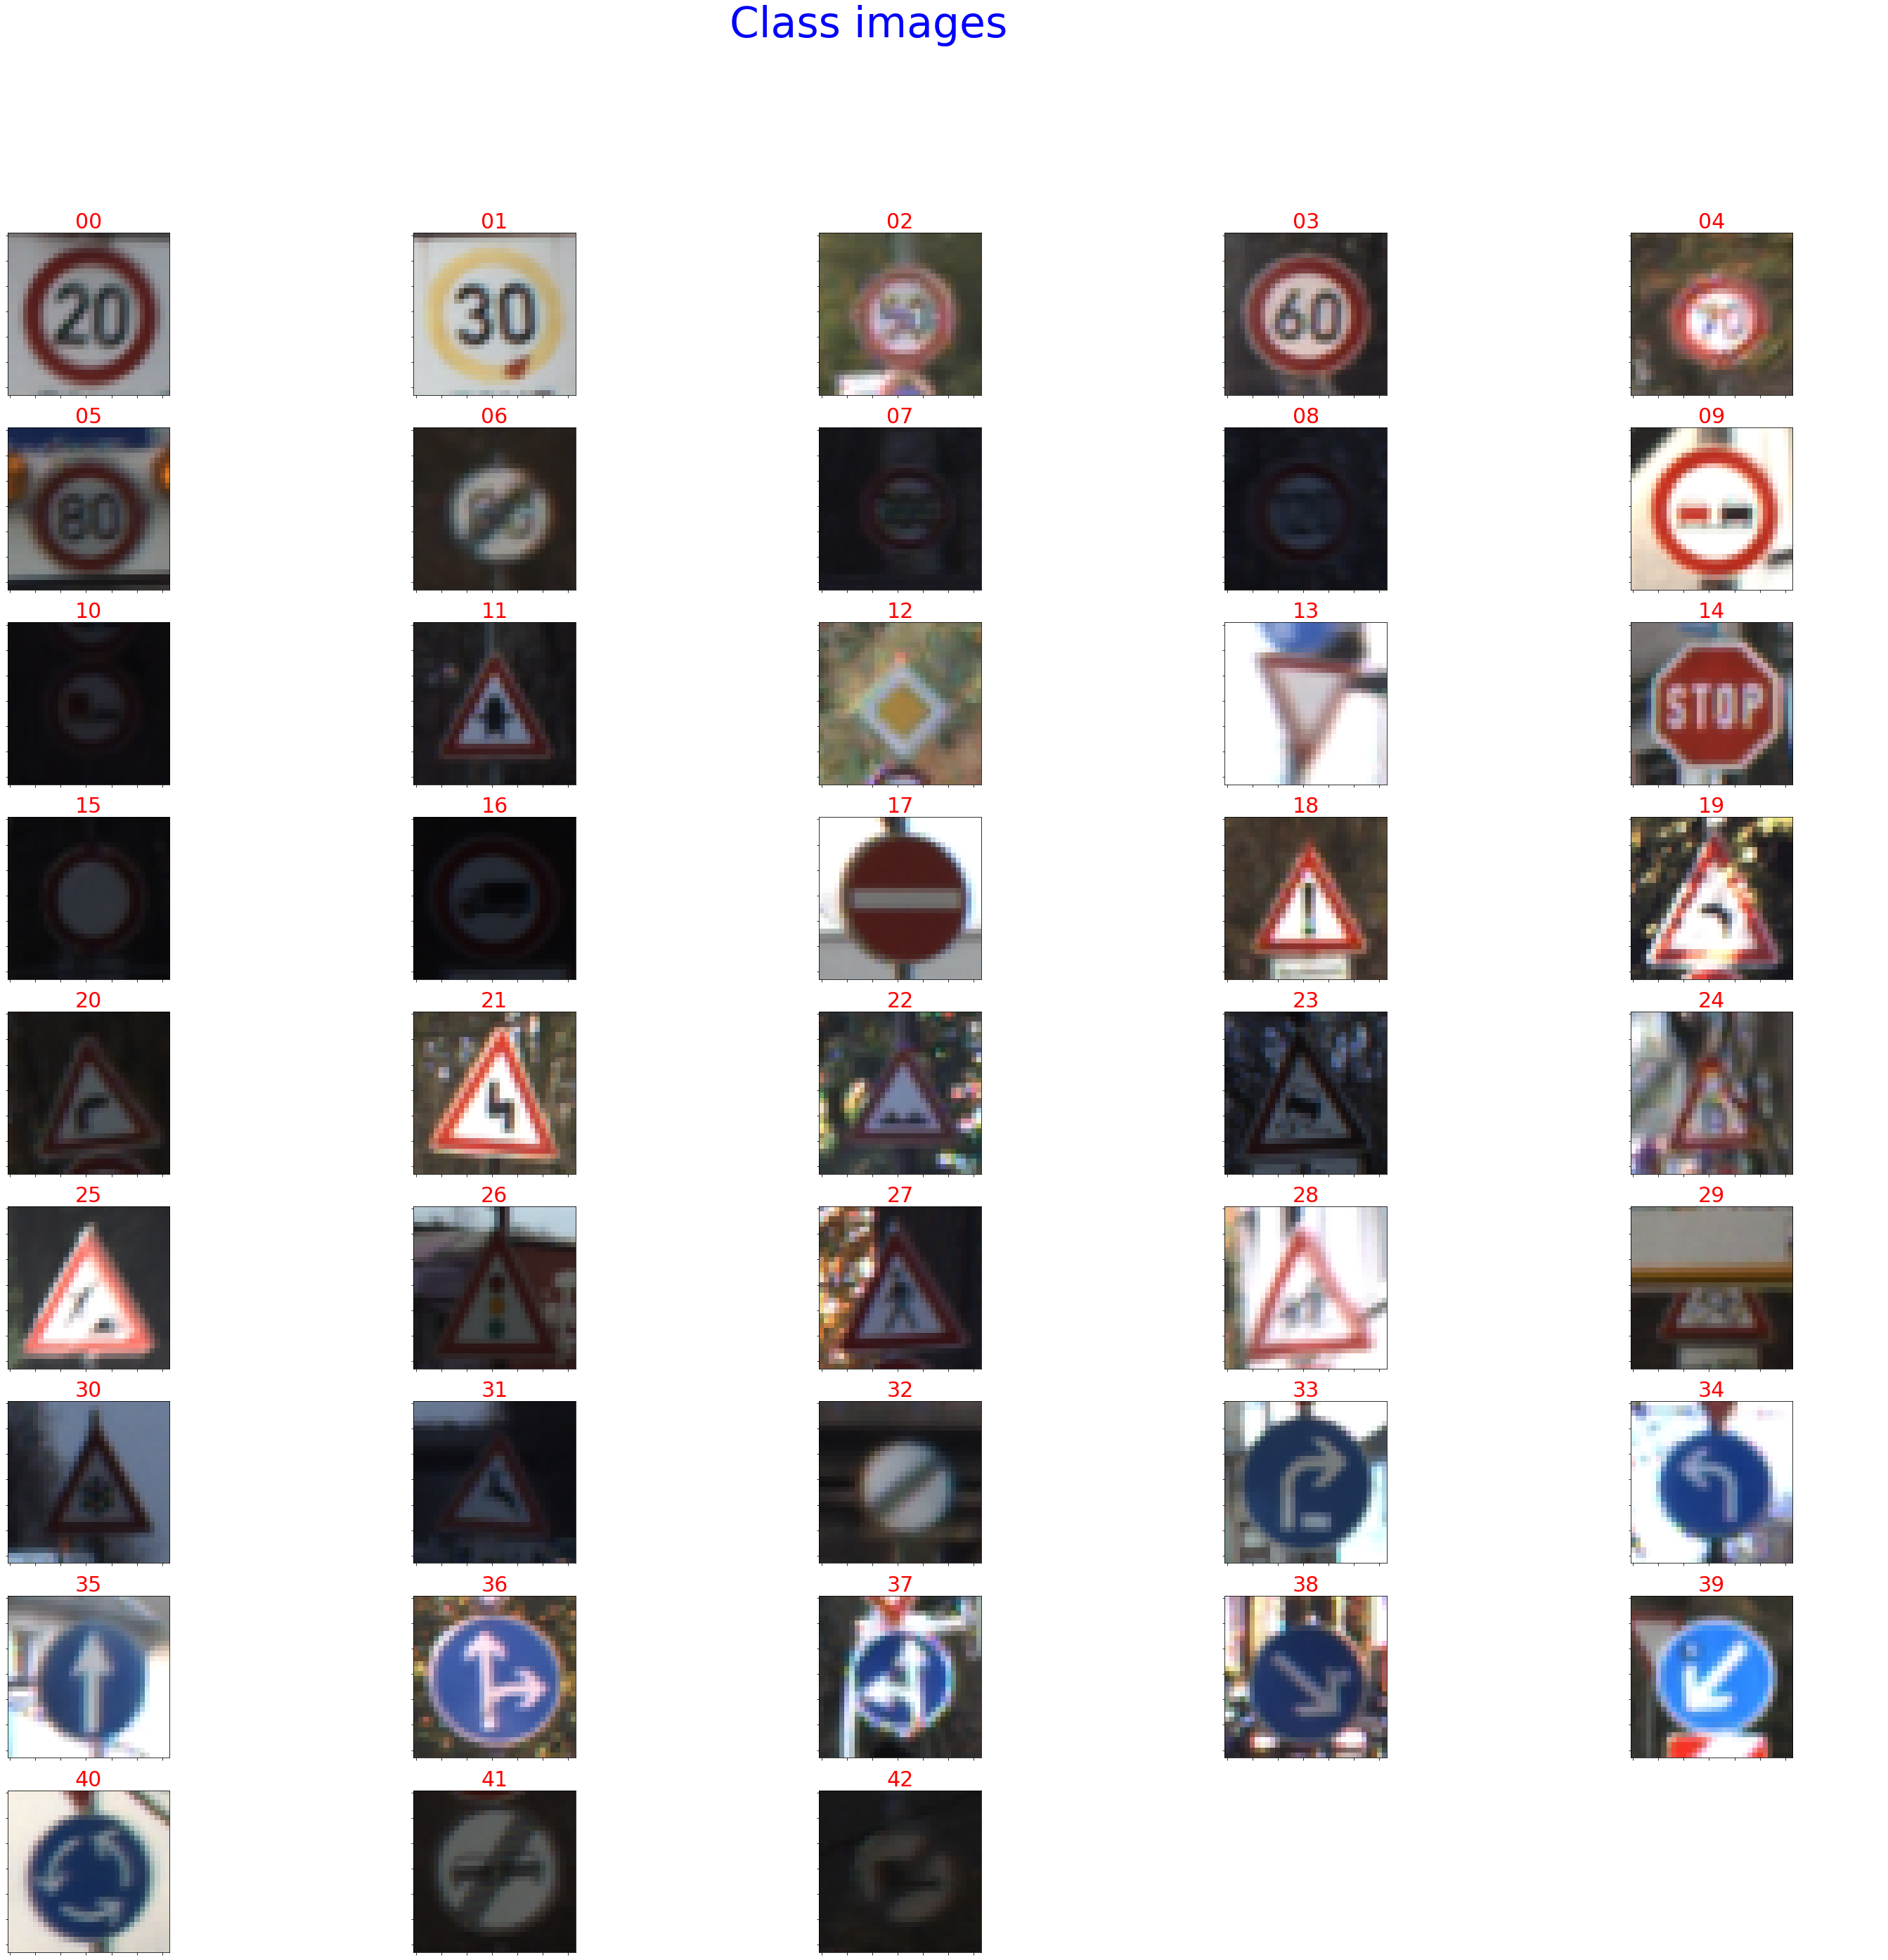

In [11]:
class_images=[]
for class_idx in range(n_classes):
    cur_X = X_train[y_train == class_idx]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    class_images.append(cur_img)
print(len(class_images))


visualize_images(class_images[0:43],'Class images',cols=5,save_name="all_class_traffic_types")

### annalysis data

Highest class: 2, 2010)
Lowest  class: 0, 180)


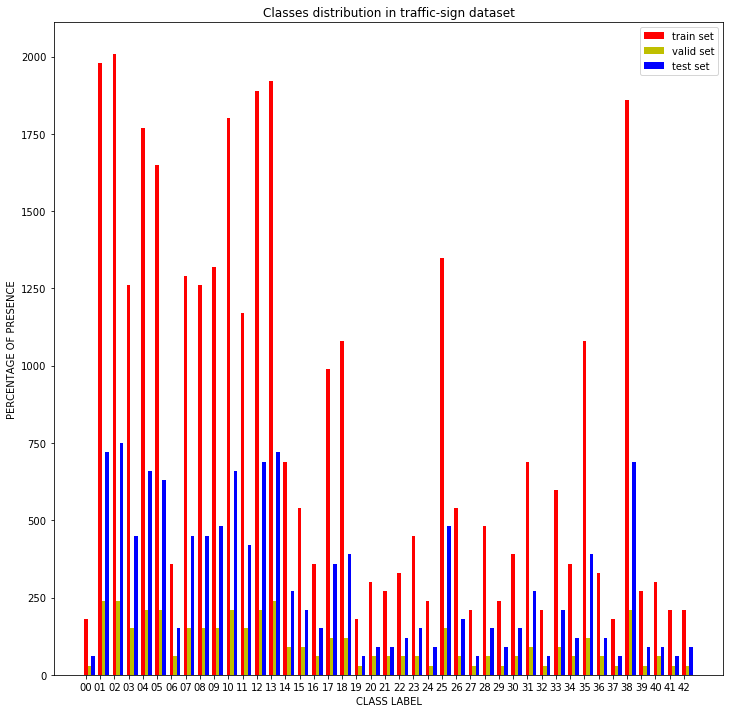

In [12]:
# bar chart of classes distribution

count_per_class_train = get_count_per_class(y_train)
count_per_class_valid = get_count_per_class(y_valid)
count_per_class_test = get_count_per_class(y_test)

print('Highest class: {}, {})'.format(np.argmax(count_per_class_train),(int)(np.max(count_per_class_train))))
print('Lowest  class: {}, {})'.format(np.argmin(count_per_class_train),(int)(np.min(count_per_class_train))))


fig,ax = plt.subplots()

col_width = 0.25

bar_train = ax.bar(np.arange(n_classes),count_per_class_train,width=col_width,color='r')
bar_valid = ax.bar(np.arange(n_classes)+col_width,count_per_class_valid,width=col_width,color='y')
bar_test = ax.bar(np.arange(n_classes)+col_width*2,count_per_class_test,width=col_width,color='b')

ax.set_ylabel('PERCENTAGE OF PRESENCE')
ax.set_xlabel('CLASS LABEL')

ax.set_title('Classes distribution in traffic-sign dataset')

ax.set_xticks(np.arange(0,n_classes,1) )

ax.set_xticklabels(['{:02d}'.format(c) for c in range(0,n_classes)])

ax.legend((bar_train[0],bar_valid[0],bar_test[0]),('train set','valid set','test set'))

fig.set_size_inches(12,12) 
plt.savefig("examples/classes_distribution.jpg")
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
from skimage import transform as transf
from sklearn.utils import shuffle

In [14]:
def random_transform(img,angle_range=[-10,10],
                    scale_range=[0.8,1.2],
                    translation_range=[-3,3]):
    '''
    The function takes an image and performs a set of random affine transformation.
    img:original images
    ang_range:angular range of the rotation [-15,+15] deg for example
    scale_range: [0.8,1.2]
    shear_range:[10,-10]
    translation_range:[-2,2]
    '''
    img_height,img_width,img_depth = img.shape
    # Generate random parameter values
    angle_value = np.random.uniform(low=angle_range[0],high=angle_range[1],size=None)
    scaleX = np.random.uniform(low=scale_range[0],high=scale_range[1],size=None)
    scaleY = np.random.uniform(low=scale_range[0],high=scale_range[1],size=None)
    translationX = np.random.randint(low=translation_range[0],high=translation_range[1]+1,size=None)
    translationY = np.random.randint(low=translation_range[0],high=translation_range[1]+1,size=None)

    center_shift = np.array([img_height,img_width])/2. - 0.5
    transform_center = transf.SimilarityTransform(translation=-center_shift)
    transform_uncenter = transf.SimilarityTransform(translation=center_shift)

    transform_aug = transf.AffineTransform(rotation=np.deg2rad(angle_value),
                                          scale=(1/scaleY,1/scaleX),
                                          translation = (translationY,translationX))
    #Image transformation : includes rotation ,shear,translation,zoom
    full_tranform = transform_center + transform_aug + transform_uncenter
    new_img = transf.warp(img,full_tranform,preserve_range=True)

    return new_img.astype('uint8')

In [15]:
def data_augmentation(X_dataset,y_dataset,augm_nbr,keep_dist=True):
    '''
    X_dataset:image dataset to augment
    y_dataset:label dataset
    keep_dist - True:keep class distribution of original dataset,
                False:balance dataset
    augm_param - is the augmentation parameter
                if keep_dist is True,increase the dataset by the factor 'augm_nbr' (2x,5x or 10x...)
                if keep_dist is False,make all classes have same number of images:'augm_nbr'(2500,3000 or 4000 imgs)
    '''
    X_train_dtype = X_train
    n_classes = len(np.unique(y_dataset))
    print(X_dataset.shape)
    n,img_height,img_width,img_depth = X_dataset.shape
    class_freq = get_count_per_class(y_train)

    if keep_dist:
        extra_imgs_per_class = np.array([x for x in get_count_per_class(y_dataset)])
    else:
        assert (augm_nbr>np.argmax(class_freq)),'augm_nbr must be larger than the height class count'
        extra_imgs_per_class = augm_nbr - get_count_per_class(y_dataset)

    total_extra_imgs = np.sum(extra_imgs_per_class)
    print("total_extra_imgs:",total_extra_imgs)

    #if extra data is needed->run the dataaumentation op
    if total_extra_imgs > 0:
        X_extra = np.zeros((int(total_extra_imgs),img_height,img_width,img_depth),dtype=X_train.dtype)
        y_extra = np.zeros(int(total_extra_imgs))
        start_idx = 0
        print('start data augmentation.....')
        for this_class in range(n_classes):
            print('\tClass {}|Number of extra imgs{}'.format(this_class,int(extra_imgs_per_class[this_class])))
            n_extra_imgs = extra_imgs_per_class[this_class]
            #print("n_extra_imgs:",n_extra_imgs)
            end_idx = start_idx + n_extra_imgs

            if n_extra_imgs > 0:
                #get ids of all images belonging to this_class
                all_imgs_id = np.argwhere(y_dataset==this_class)
                new_imgs_x = np.zeros((int(n_extra_imgs),img_height,img_width,img_depth))

                for k in range(int(n_extra_imgs)):
                    #randomly pick an original image belonging to this class
                    rand_id = np.random.choice(all_imgs_id[0],size=None,replace=True)
                    rand_img = X_train[rand_id]
                    #Transform image
                    new_img = random_transform(rand_img)
                    new_imgs_x[k,:,:,:] = new_img
                #update tensors with new images and associated labels
                X_extra[int(start_idx):int(end_idx)] = new_imgs_x
                
                y_extra[int(start_idx):int(end_idx)] = this_class*np.ones((int(n_extra_imgs),))
                #print(n_extra_imgs,y_extra[int(start_idx):int(end_idx)])
                this_class
                start_idx = end_idx
        return [X_extra,y_extra]
    else:
        return [None,None]


In [16]:
print(count_per_class_train)
# shuffle train dataset before split
X_train,y_train = shuffle(X_train,y_train)
print(X_train.shape)
n,IMGHEIGHT,IMG_WIDTH,IMG_DEPTH = X_train.shape


X_extra,y_extra = data_augmentation(X_train,y_train,augm_nbr=4000,keep_dist=True)

[ 180. 1980. 2010. 1260. 1770. 1650.  360. 1290. 1260. 1320. 1800. 1170.
 1890. 1920.  690.  540.  360.  990. 1080.  180.  300.  270.  330.  450.
  240. 1350.  540.  210.  480.  240.  390.  690.  210.  599.  360. 1080.
  330.  180. 1860.  270.  300.  210.  210.]
(34799, 32, 32, 3)
(34799, 32, 32, 3)
total_extra_imgs: 34799.0
start data augmentation.....
	Class 0|Number of extra imgs180
	Class 1|Number of extra imgs1980
	Class 2|Number of extra imgs2010
	Class 3|Number of extra imgs1260
	Class 4|Number of extra imgs1770
	Class 5|Number of extra imgs1650
	Class 6|Number of extra imgs360
	Class 7|Number of extra imgs1290
	Class 8|Number of extra imgs1260
	Class 9|Number of extra imgs1320
	Class 10|Number of extra imgs1800
	Class 11|Number of extra imgs1170
	Class 12|Number of extra imgs1890
	Class 13|Number of extra imgs1920
	Class 14|Number of extra imgs690
	Class 15|Number of extra imgs540
	Class 16|Number of extra imgs360
	Class 17|Number of extra imgs990
	Class 18|Number of extra imgs

(34799, 32, 32, 3)
(34799,)
[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7.]
[12  5 13 25  5  5 12 34  5 10  7 11  8  2 34  4 34 18 15  9  5  3 31 35
 14 28  1  4 35 12  7 38 17 40  8 35  3  0 31 24 11  9 11 25  1 18  9 29
  9  2]
43


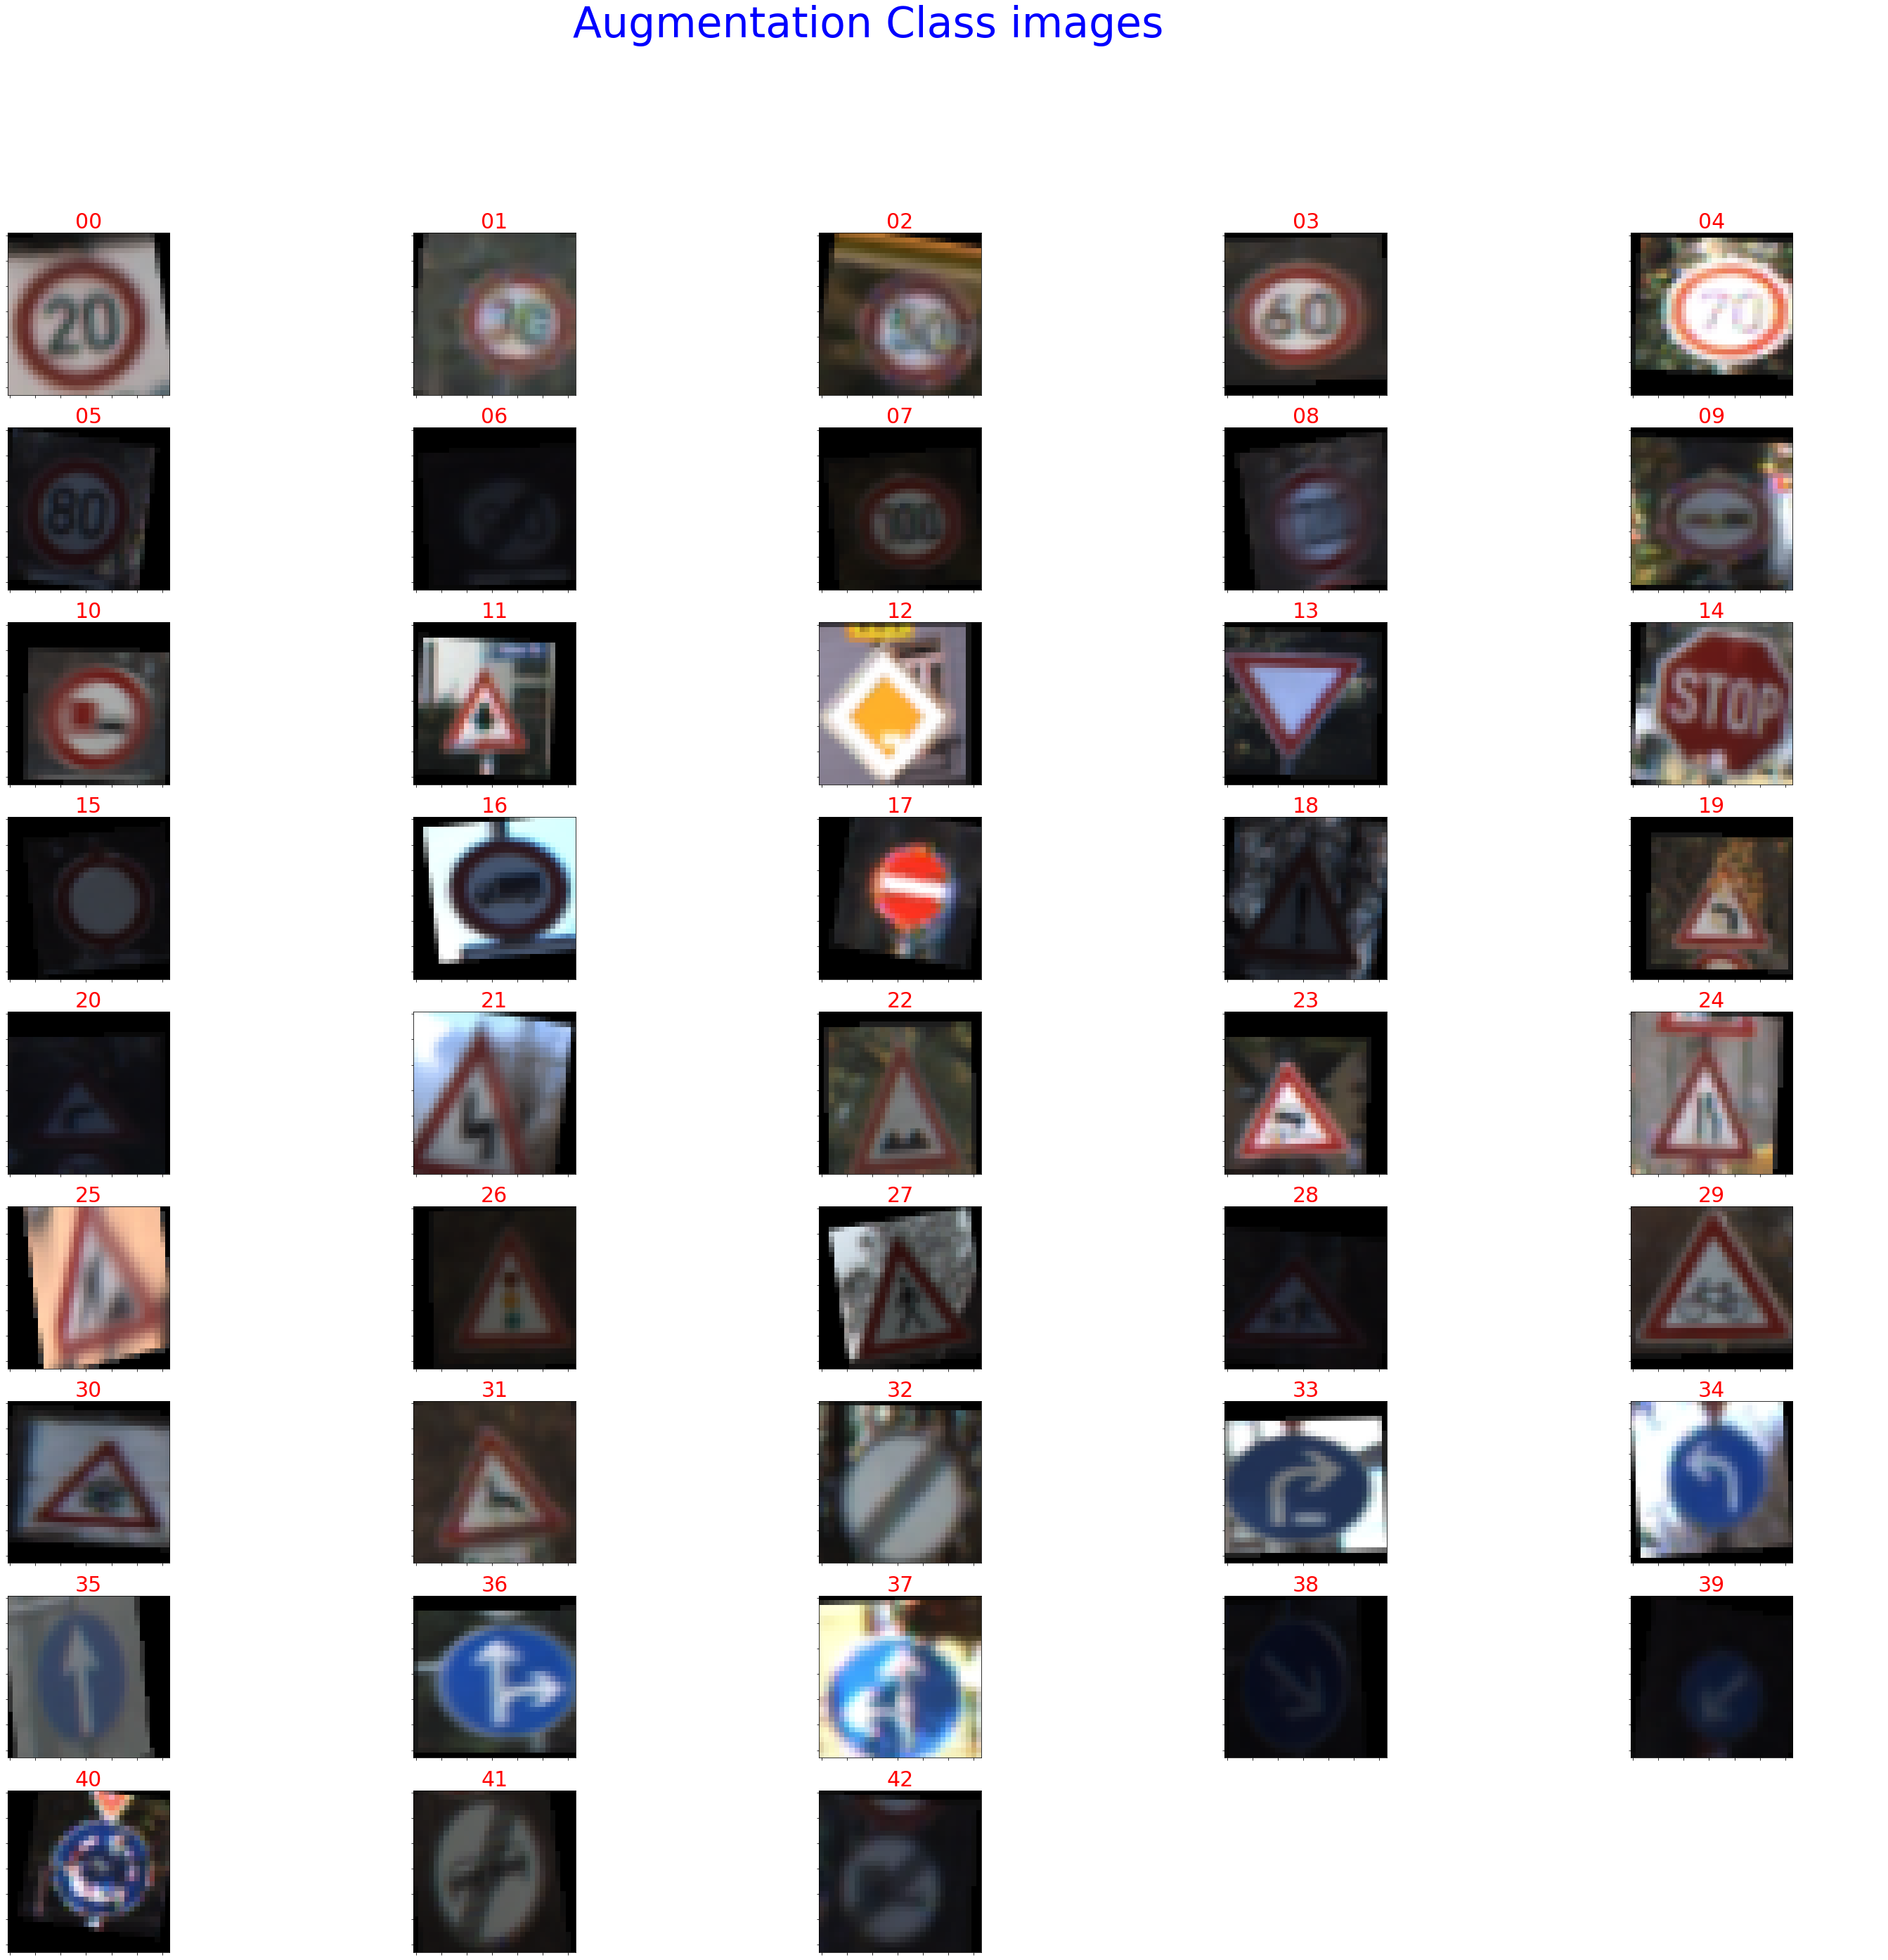

In [17]:
print(X_extra.shape)
print(y_extra.shape)
print(y_extra[10000:10150])
print(y_train[1000:1050])

Aug_class_images=[]
for class_idx in range(n_classes):
    cur_X = X_extra[y_extra == class_idx]
    cur_img = cur_X[np.random.randint(len(cur_X))]
    Aug_class_images.append(cur_img)
print(len(Aug_class_images))

visualize_images(Aug_class_images,'Augmentation Class images',cols=5,save_name="all_Aug_class_traffic_types")

In [18]:

#visualize_images(a,'Class images',cols=5)

print(X_train.shape)

(34799, 32, 32, 3)


In [19]:

print(y_train.shape)

if X_extra is not None:
    X_train = np.concatenate((X_train,X_extra.astype('uint8')),axis=0)
    y_train = np.concatenate((y_train,y_extra),axis=0)
    del X_extra,y_extra

(34799,)


In [20]:
print(X_train.shape)
print(y_train.shape)

(69598, 32, 32, 3)
(69598,)


Highest class: 2, 4020)
Lowest  class: 0, 360)


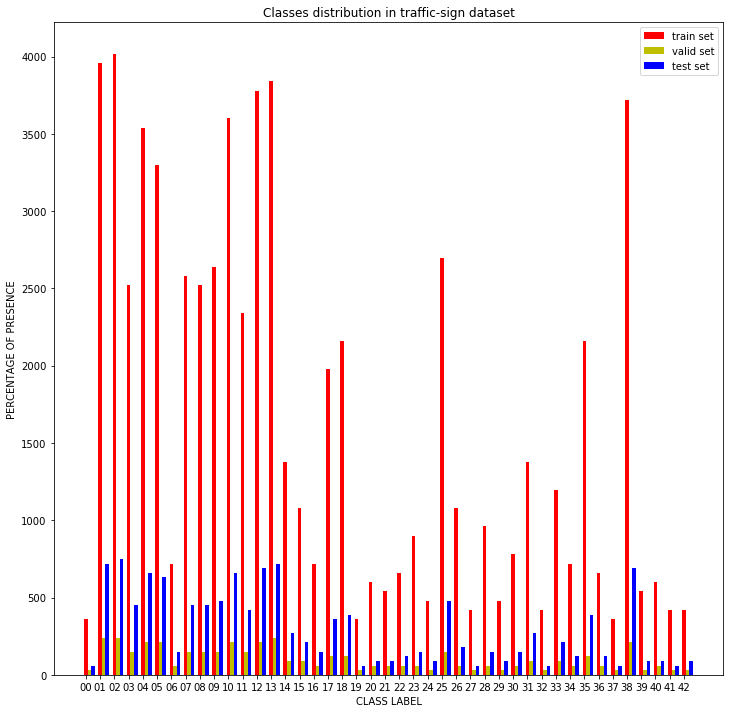

In [21]:
count_per_class_train = get_count_per_class(y_train)
count_per_class_valid = get_count_per_class(y_valid)
count_per_class_test = get_count_per_class(y_test)

print('Highest class: {}, {})'.format(np.argmax(count_per_class_train),(int)(np.max(count_per_class_train))))
print('Lowest  class: {}, {})'.format(np.argmin(count_per_class_train),(int)(np.min(count_per_class_train))))


fig,ax = plt.subplots()

col_width = 0.25

bar_train = ax.bar(np.arange(n_classes),count_per_class_train,width=col_width,color='r')
bar_valid = ax.bar(np.arange(n_classes)+col_width,count_per_class_valid,width=col_width,color='y')
bar_test = ax.bar(np.arange(n_classes)+col_width*2,count_per_class_test,width=col_width,color='b')

ax.set_ylabel('PERCENTAGE OF PRESENCE')
ax.set_xlabel('CLASS LABEL')

ax.set_title('Classes distribution in traffic-sign dataset')

ax.set_xticks(np.arange(0,n_classes,1) )

ax.set_xticklabels(['{:02d}'.format(c) for c in range(0,n_classes)])

ax.legend((bar_train[0],bar_valid[0],bar_test[0]),('train set','valid set','test set'))

fig.set_size_inches(12,12) 
plt.savefig("examples/classes_distribution_argu.jpg")
plt.show()

In [22]:
# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    image_data = np.float32(image_data)
    
    return (image_data-127.5)/128


Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$

In [23]:
# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale2(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    
    return a + ((image_data-grayscale_min)*(b-a))/(grayscale_max-grayscale_min)

In [24]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def preprocess_features(X):
    # Convert from RGB to YUV
    X = np.array([np.expand_dims(cv2.cvtColor(rgb_img,cv2.COLOR_RGB2YUV)[:,:,0],2) for rgb_img in X])

    '''
    other ways to preprocess_feature
    cv2.equalizeHist(img),2)
    # Standardize features
    X -= np.mean(X,axis=0)
    X /= (np.std(X,axis=0) + np.finfo('float32').eps)
    '''

    X = normalize_grayscale(np.array(X))
    
    return X


### Pre-process the Data Set for Lenet model train

In [25]:
X_train_norm = preprocess_features(X_train)
X_valid_norm = preprocess_features(X_valid)
X_test_norm = preprocess_features(X_test)

print(X_train.shape)
print(X_train_norm.shape)
print(y_train.shape)

print(X_train_norm[0][0][0])

(69598, 32, 32, 3)
(69598, 32, 32, 1)
(69598,)
[-0.66015625]


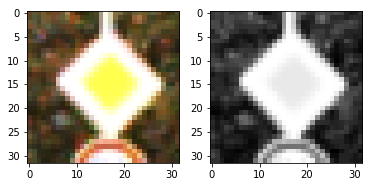

In [26]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(X_train[1000])
ax[1].imshow(cv2.cvtColor(X_train[1000],cv2.COLOR_RGB2YUV)[:,:,0],cmap='gray')
plt.savefig("./examples/src_gray.jpg")
plt.show()

### Model Architecture

In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten


def LeNet(x,n_classes,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    '''
    VALID Padding, the output height and width are computed as:
    out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))

    '''
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x8
    conv1_W = tf.Variable(tf.truncated_normal((3,3,1,8),mean=mu, stddev=sigma)) 
    conv1_b = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding='VALID') + conv1_b #（32-5+1）/1=28  28x28x6
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    '''
    Pooling:
    new_height = (input_height - filter_height)/S + 1
    new_width = (input_width - filter_width)/S + 1
    '''
    # TODO: Pooling. Input = 28x28x6. Output = 15x15x8
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    conv1 = tf.nn.dropout(conv1, keep_prob)
    

    # TODO: Layer 2: Convolutional. Output = 13x13x16.
    #input:14x14x6
    conv2_W = tf.Variable(tf.truncated_normal((3,3,8,26),mean=mu, stddev=sigma)) 
    conv2_b = tf.Variable(tf.zeros(26))
    conv2 = tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding='VALID') + conv2_b #（14-5+1）/1=10  10x10x16
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 6x6x26.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal((936,400),mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0,fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
     
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal((400,120),mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1,fc2_W) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_W = tf.Variable(tf.truncated_normal((120,84),mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(84))
    fc3 = tf.matmul(fc2,fc3_W) + fc3_b
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc4_W = tf.Variable(tf.truncated_normal((84,n_classes),mean=mu, stddev=sigma))
    fc4_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3,fc4_W) + fc4_b
    
    return logits

/home/leon/x86_install/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [28]:
def LeNet2(x,n_classes,keep_prob): 
    mu =0
    sigma = 0.1
    #Layer 1: Convolution 1 Input :32x32x1 Output:28x28x6
    W1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma),name='W1')
    x = tf.nn.conv2d(x,W1,strides=[1,1,1,1],padding='VALID')
    b1 = tf.Variable(tf.zeros(6),name='b1')
    x = tf.nn.bias_add(x,b1)
    #print('layer 1 shape:',x.get_shape())

    #Activation
    x = tf.nn.relu(x)
    # Pooling Input:28x28x6 output:14x14x6
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    layer1 = x

    #Layer2:Convolutiona 1 Output=10x10x16
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma),name='W2')
    x = tf.nn.conv2d(x,W2,strides=[1,1,1,1],padding='VALID')
    b2 = tf.Variable(tf.zeros(16),name='b2')
    x = tf.nn.bias_add(x,b2)

    #Activation
    x = tf.nn.relu(x)
    #Pooling Input=10x10x16 Output=5x5x16
    x = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    layer2 = x

    #Layer3 Convolutional Output = 1x1x400
    W3 = tf.Variable(tf.truncated_normal(shape=(5,5,16,400),mean=mu,stddev=sigma),name='W3')
    x = tf.nn.conv2d(x,W3,strides=[1,1,1,1],padding='VALID')
    b3 = tf.Variable(tf.zeros(400),name='b3')
    x = tf.nn.bias_add(x,b3)

    #TODO:Activation
    x = tf.nn.relu(x)
    layers3 = x

    #TODO:Flateen Input:5x5x16 Output:400
    layer2flat = flatten(layer2)
    #print('layer2flat shape:',layer2flat.get_shape())

    #Flatten x Input =1x1x400 Output = 400
    xflat = flatten(x)
    #print('xflat shape:',xflat.get_shape())

    #Concat layer2flat and x Input=400+400 Output=800
    x = tf.concat([xflat,layer2flat],1)
    #print('x shape:',x.get_shape())

    #Dropout
    x = tf.nn.dropout(x,keep_prob)

    #Layer4:Fully Connected Input:800,Output:43
    W4 = tf.Variable(tf.truncated_normal(shape=(800,n_classes),mean=mu,stddev=sigma),name='W4')
    b4 = tf.Variable(tf.zeros(n_classes),name='b4')
    logits = tf.add(tf.matmul(x,W4),b4)

    return logits

In [29]:
def LeNet3(x,n_classes,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    '''
    VALID Padding, the output height and width are computed as:
    out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))

    '''
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x8
    conv1_W = tf.Variable(tf.truncated_normal((3,3,1,8),mean=mu, stddev=sigma)) 
    conv1_b = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding='VALID') + conv1_b #（32-5+1）/1=28  28x28x6
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    '''
    Pooling:
    new_height = (input_height - filter_height)/S + 1
    new_width = (input_width - filter_width)/S + 1
    '''
    # TODO: Pooling. Input = 28x28x6. Output = 15x15x8
    #conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    conv1 = tf.nn.dropout(conv1, keep_prob)
    

    # TODO: Layer 2: Convolutional. Output = 13x13x16.
    #input:14x14x6
    conv2_W = tf.Variable(tf.truncated_normal((3,3,8,26),mean=mu, stddev=sigma)) 
    conv2_b = tf.Variable(tf.zeros(26))
    conv2 = tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding='VALID') + conv2_b #（14-5+1）/1=10  10x10x16
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 6x6x26.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    
     # TODO: Layer 2: Convolutional. Output = 13x13x16.
    #input:14x14x6
    conv3_W = tf.Variable(tf.truncated_normal((3,3,26,60),mean=mu, stddev=sigma)) 
    conv3_b = tf.Variable(tf.zeros(60))
    conv3 = tf.nn.conv2d(conv2,conv3_W,strides=[1,1,1,1],padding='VALID') + conv3_b #（14-5+1）/1=10  10x10x16
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)

    # TODO: Pooling. Input = 10x10x16. Output = 6x6x26.
    conv3 = tf.nn.max_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv3)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal((2160,400),mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0,fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
     
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal((400,120),mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1,fc2_W) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_W = tf.Variable(tf.truncated_normal((120,84),mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(84))
    fc3 = tf.matmul(fc2,fc3_W) + fc3_b
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc4_W = tf.Variable(tf.truncated_normal((84,n_classes),mean=mu, stddev=sigma))
    fc4_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc3,fc4_W) + fc4_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [42]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

N_CLASSES = n_classes

EPOCHS = 32
BATCH_SIZE = 128


In [43]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, N_CLASSES)
print(one_hot_y)

Tensor("one_hot_2:0", dtype=float32)


In [44]:
rate = 0.0009
keep_prob = tf.placeholder(tf.float32)

logits = LeNet3(x,N_CLASSES,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [45]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [ ]:
save_file = 'data/lenet_model.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()

    VALID_accuracy=[]
    
    for i in range(EPOCHS):
        if i > 10:
            rate = 0.0001
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        VALID_accuracy.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    train_accuracy = evaluate(X_train_norm, y_train)
    print("train_accuracy Accuracy = {:.3f}".format(train_accuracy))
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess,save_file,global_step=EPOCHS)
    
    print("Model saved")
    
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.680

EPOCH 2 ...
Validation Accuracy = 0.840

EPOCH 3 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.908

EPOCH 5 ...
Validation Accuracy = 0.911

EPOCH 6 ...
Validation Accuracy = 0.922

EPOCH 7 ...
Validation Accuracy = 0.939

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.934

EPOCH 10 ...
Validation Accuracy = 0.932

EPOCH 11 ...
Validation Accuracy = 0.941

EPOCH 12 ...
Validation Accuracy = 0.943

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.950

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.940

EPOCH 19 ...
Validation Accuracy = 0.943

EPOCH 20 ...
Validation Accuracy = 0.953

EPOCH 21 ...
Validation Accuracy = 0.947

EPOCH 22 ...
Validation Accuracy = 0.946

EPOCH 23 ...
Validation Accuracy = 0.936



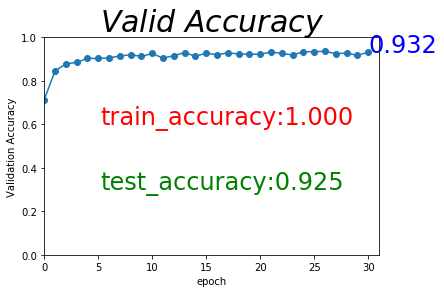

In [41]:
plt.plot(np.arange(EPOCHS),VALID_accuracy)

plt.scatter(np.arange(EPOCHS),np.array(VALID_accuracy))

plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')

plt.xlim(0,EPOCHS)
plt.ylim(0.,1.0)

plt.title(r'$Valid\ Accuracy$',fontsize=30)
plt.text(EPOCHS-1,VALID_accuracy[-1],r'{0:.3f}'.format(VALID_accuracy[-1]),fontdict={'size':'24','color':'b'})
plt.text(EPOCHS/6,0.6,r'train_accuracy:{0:.3f}'.format(train_accuracy),fontdict={'size':'24','color':'r'})
plt.text(EPOCHS/6,0.3,r'test_accuracy:{0:.3f}'.format(test_accuracy),fontdict={'size':'24','color':'g'})
plt.savefig("./examples/train_accuracy_{}_{}_{}.jpg".format(EPOCHS,BATCH_SIZE,rate))
plt.show()

In [ ]:
N_CLASSES = n_classes

EPOCHS = 30
BATCH_SIZE = 128

rate = 0.0009
keep_prob = tf.placeholder(tf.float32)

logits = LeNet(x,N_CLASSES,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

save_file = 'data/lenet_model.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()

    VALID_accuracy=[]
    
    for i in range(EPOCHS):
        if i > 10:
            rate = 0.0001
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        VALID_accuracy.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    train_accuracy = evaluate(X_train_norm, y_train)
    print("train_accuracy Accuracy = {:.3f}".format(train_accuracy))
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess,save_file,global_step=EPOCHS)
    
    print("Model saved")
plt.plot(np.arange(EPOCHS),VALID_accuracy)

plt.scatter(np.arange(EPOCHS),np.array(VALID_accuracy))

plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')

plt.xlim(0,EPOCHS)
plt.ylim(0.,1.0)

plt.title(r'$Valid\ Accuracy$',fontsize=30)
plt.text(EPOCHS-1,VALID_accuracy[-1],r'{0:.3f}'.format(VALID_accuracy[-1]),fontdict={'size':'24','color':'b'})
plt.text(EPOCHS/6,0.6,r'train_accuracy:{0:.3f}'.format(train_accuracy),fontdict={'size':'24','color':'r'})
plt.text(EPOCHS/6,0.3,r'test_accuracy:{0:.3f}'.format(test_accuracy),fontdict={'size':'24','color':'g'})
plt.savefig("./examples/train_accuracy_{}_{}_{}.jpg".format(EPOCHS,BATCH_SIZE,rate))
plt.show()

In [ ]:
N_CLASSES = n_classes

EPOCHS = 31
BATCH_SIZE = 128

rate = 0.0009
keep_prob = tf.placeholder(tf.float32)

logits = LeNet2(x,N_CLASSES,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

save_file = 'data/lenet_model.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()

    VALID_accuracy=[]
    
    for i in range(EPOCHS):
        if i > 10:
            rate = 0.0001
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        VALID_accuracy.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    train_accuracy = evaluate(X_train_norm, y_train)
    print("train_accuracy Accuracy = {:.3f}".format(train_accuracy))
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess,save_file,global_step=EPOCHS)
    
    print("Model saved")
plt.plot(np.arange(EPOCHS),VALID_accuracy)

plt.scatter(np.arange(EPOCHS),np.array(VALID_accuracy))

plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')

plt.xlim(0,EPOCHS)
plt.ylim(0.,1.0)

plt.title(r'$Valid\ Accuracy$',fontsize=30)
plt.text(EPOCHS-1,VALID_accuracy[-1],r'{0:.3f}'.format(VALID_accuracy[-1]),fontdict={'size':'24','color':'b'})
plt.text(EPOCHS/6,0.6,r'train_accuracy:{0:.3f}'.format(train_accuracy),fontdict={'size':'24','color':'r'})
plt.text(EPOCHS/6,0.3,r'test_accuracy:{0:.3f}'.format(test_accuracy),fontdict={'size':'24','color':'g'})
plt.savefig("./examples/train_accuracy_{}_{}_{}.jpg".format(EPOCHS,BATCH_SIZE,rate))
plt.show()

In [ ]:
N_CLASSES = n_classes

EPOCHS = 32
BATCH_SIZE = 128

rate = 0.0009
keep_prob = tf.placeholder(tf.float32)

logits = LeNet3(x,N_CLASSES,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

save_file = 'data/lenet_model.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()

    VALID_accuracy=[]
    
    for i in range(EPOCHS):
        if i > 10:
            rate = 0.0001
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        VALID_accuracy.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    train_accuracy = evaluate(X_train_norm, y_train)
    print("train_accuracy Accuracy = {:.3f}".format(train_accuracy))
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess,save_file,global_step=EPOCHS)
    
    print("Model saved")
plt.plot(np.arange(EPOCHS),VALID_accuracy)

plt.scatter(np.arange(EPOCHS),np.array(VALID_accuracy))

plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')

plt.xlim(0,EPOCHS)
plt.ylim(0.,1.0)

plt.title(r'$Valid\ Accuracy$',fontsize=30)
plt.text(EPOCHS-1,VALID_accuracy[-1],r'{0:.3f}'.format(VALID_accuracy[-1]),fontdict={'size':'24','color':'b'})
plt.text(EPOCHS/6,0.6,r'train_accuracy:{0:.3f}'.format(train_accuracy),fontdict={'size':'24','color':'r'})
plt.text(EPOCHS/6,0.3,r'test_accuracy:{0:.3f}'.format(test_accuracy),fontdict={'size':'24','color':'g'})
plt.savefig("./examples/train_accuracy_{}_{}_{}.jpg".format(EPOCHS,BATCH_SIZE,rate))
plt.show()

In [45]:
with tf.Session() as sess:
# restore saved session with highest validation accuracy
    #saver = tf.train.import_meta_graph('model_path/-2.meta') # 以.meta文件名为-2.meta为例
    #saver.restore(sess, tf.train.latest_checkpoint(model_path))

    saver.restore(sess, "data/lenet_model.ckpt-{}".format(EPOCHS))

    test_accuracy = evaluate(X_test_norm,y_test)

    print('Performance on test set: {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from data/lenet_model.ckpt-31
Performance on test set: 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Images download from http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import glob
import os
import matplotlib.pyplot as plt
import math

### 由于之前从http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset下载图片都是1.0概率，怀疑过拟合，另外下载了测试图片

http://fennelblog.com/archives/1456#speed

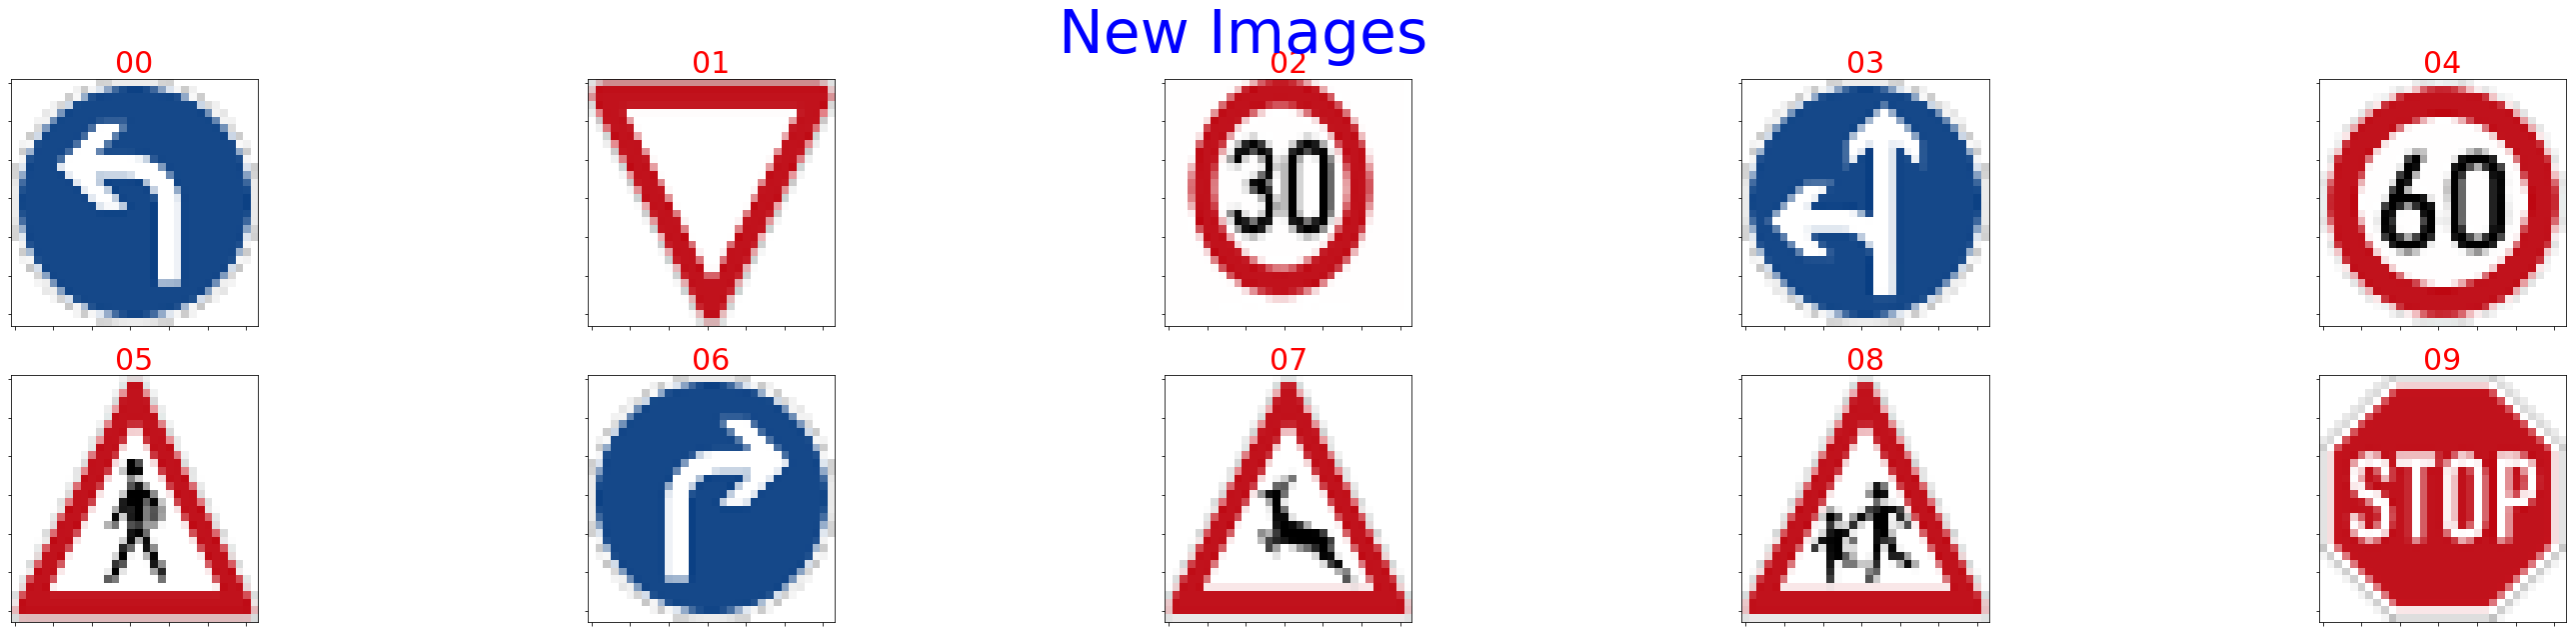

In [47]:
def get_list_files(my_dir):
    list_f = []
    for file in os.listdir(my_dir):
        if file.endswith('.jpg') or file.endswith('.png'):
            f_path = my_dir+'/'+file
            list_f.append(f_path)
    return list_f

my_dir = './test_images'
file_list = get_list_files(my_dir)
#print(file_list)
img_data=[]

for file in file_list:
    cur_img = cv2.imread(file)
    #print(cur_img.shape)
    cur_img = cv2.resize(cur_img,(32,32))
    cur_img = cv2.cvtColor(cur_img,cv2.COLOR_BGR2RGB)
    img_data.append(cur_img)
    
visualize_images(img_data,"New Images",save_name='New_Images.jpg')

## Predict the Sign Type for Each Image
### predict traffic type

numpy.loadtxt(fname, dtype=, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

In [48]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def predict_Sign_Type(X_data):
    X_data = preprocess_features(X_data)
    softmax_operation = tf.nn.softmax(logits)
    with tf.Session() as sess:
        saver.restore(sess, "data/lenet_model.ckpt-{}".format(EPOCHS))
        #sess.run(tf.global_variables_initializer())
        num_examples = len(X_data)
        result = sess.run(softmax_operation, feed_dict={x:X_data, keep_prob:1.0})
        result = sess.run(tf.argmax(result, 1))
    return result
def predict_Sign_Softmax(X_data):
    X_data = preprocess_features(X_data)
    softmax_operation = tf.nn.softmax(logits)
    with tf.Session() as sess:
        saver.restore(sess, "data/lenet_model.ckpt-{}".format(EPOCHS))
        #sess.run(tf.global_variables_initializer())
        num_examples = len(X_data)
        result = sess.run(softmax_operation, feed_dict={x:X_data, keep_prob:1.0})

    return result



In [49]:
index,name = np.loadtxt('signnames.csv',dtype=str,skiprows=1,delimiter=',',usecols=(0,1),unpack=True)
index = index.astype(np.int16)
print(index)
map_table=dict(zip(index,name))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [50]:
result_type_id = predict_Sign_Type(img_data)
print(result_type_id)


INFO:tensorflow:Restoring parameters from data/lenet_model.ckpt-31
[ 1 13  1 37  3 18 33 31 28  1]


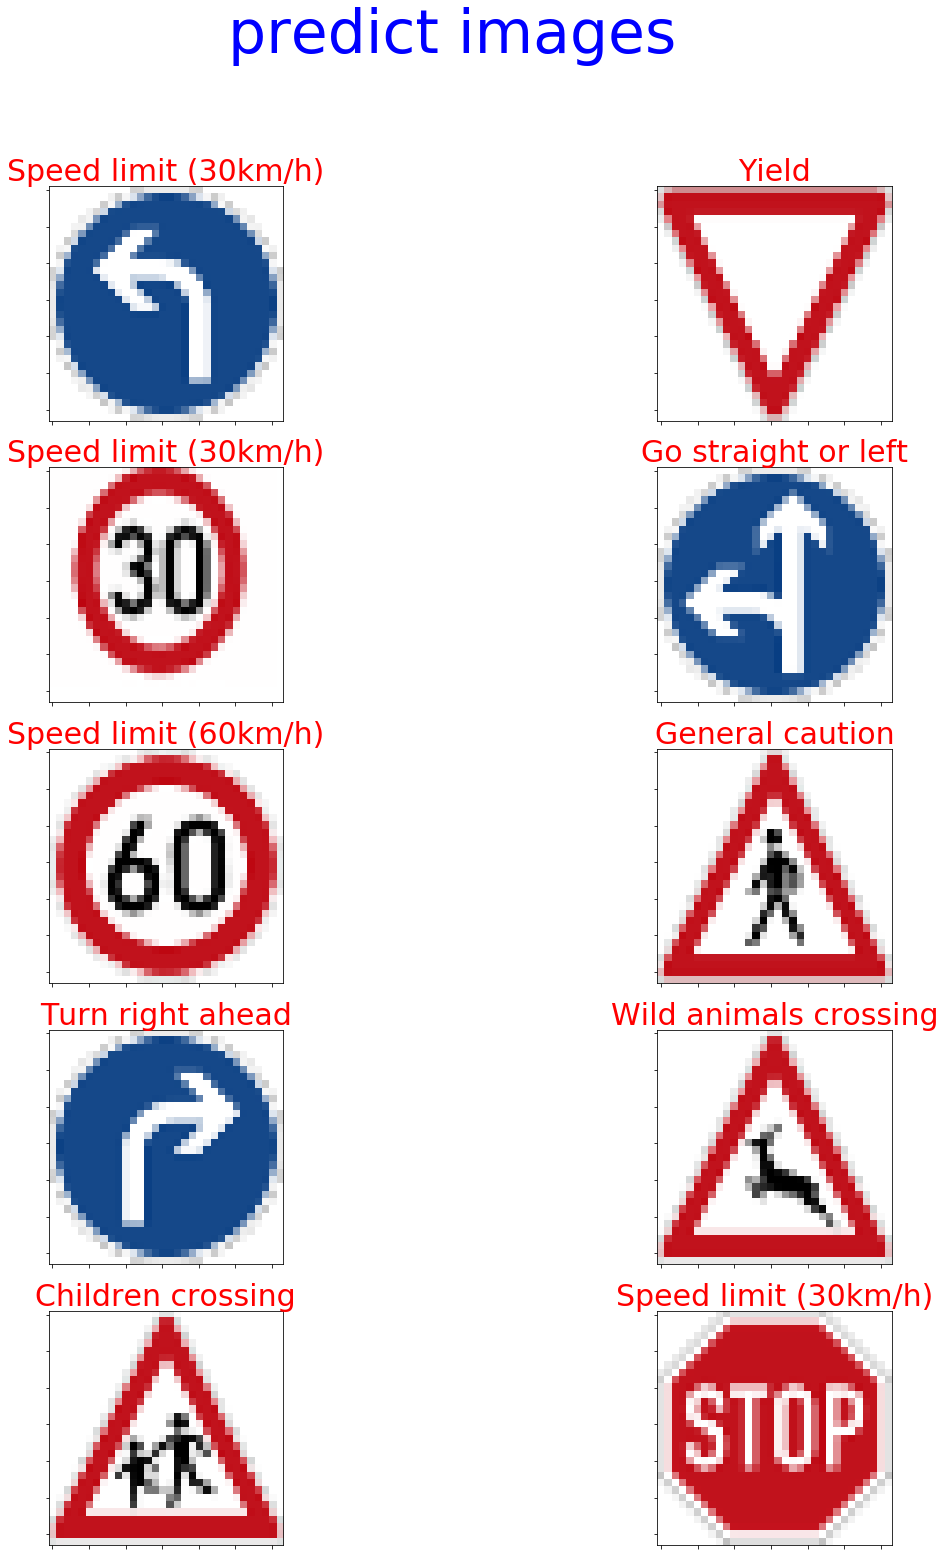

In [51]:
Traffic_Signs_names=[]
for item in result_type_id:
    Traffic_Signs_names.append(map_table[item])

visualize_images(img_data,"predict images",cols=2,show_title=Traffic_Signs_names,save_name='predict_images.jpg')

### Analyze Performance

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

according plt.show() "Class images",7 images in all 10 images are correct!

accurate on the 10's new images is 70%.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [125]:
#18 13  4 13 40 14 11  1 22 17 12 26 23 16  7 35
#Traffic_Signs_names
result_sign_softmax = predict_Sign_Softmax(img_data)
print(result_sign_softmax.shape)
len_predict_types = len(Traffic_Signs_names)
print("len_predict_types:",len_predict_types)
k_top = 5
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # top 5 probabilities
    top_k_proba = sess.run(tf.nn.top_k(result_sign_softmax,k_top))


INFO:tensorflow:Restoring parameters from data/lenet_model.ckpt-30
(10, 43)
len_predict_types: 10


In [126]:
#for each images, the max probability
for i in np.arange(len_predict_types):
    print(top_k_proba[0][i][0])

0.9996731
0.9998721
0.70305157
1.0
0.9997359
1.0
0.90185094
1.0
1.0
1.0


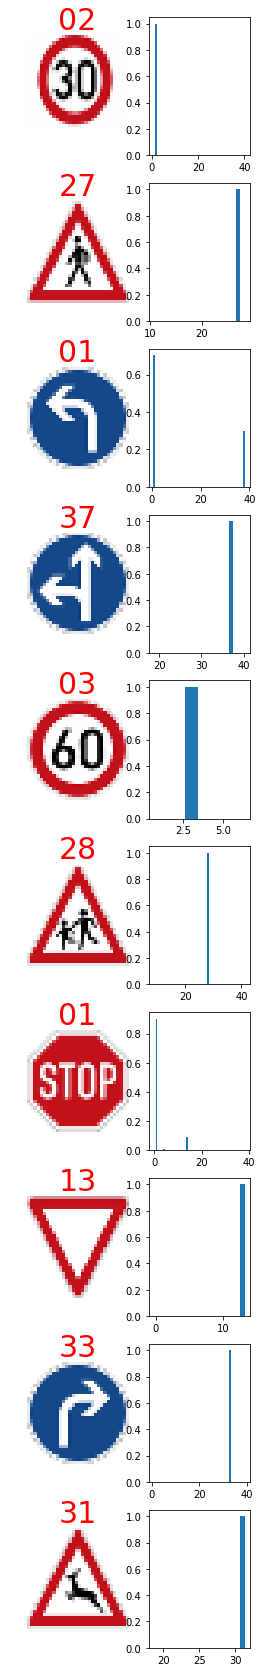

In [127]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
fig,ax = plt.subplots(len_predict_types,2,figsize=(4,len_predict_types*3))

for i in np.arange(len_predict_types):
    col_plot = 0
    cur_img = img_data[i]
    cur_name = Traffic_Signs_names[i]
    cur_result_softmax = result_sign_softmax[i]
    ax[i,col_plot].imshow(cur_img)
    ax[i,col_plot].set_title('{:02d}'.format(result_type_id[i]),fontsize=30,color='r')
    ax[i,col_plot].axis('off')
    col_plot +=1
    
    ax[i,col_plot].bar(top_k_proba[1][i],top_k_proba[0][i],align='center')
   
plt.savefig("./examples/Top_proba_new_images.jpg")
plt.show()       

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [83]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")